In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

#Data Preprocessing 
from sklearn.preprocessing import StandardScaler

#Data Splitting 
from sklearn.model_selection import train_test_split

#Model 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Evaluation 
from sklearn.metrics import r2_score , classification_report , confusion_matrix , accuracy_score 

#
from collections import Counter


df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# Prfüfen , ob eine Linearität zwischen die Parameter existieren
corr_df = df.corr(method='pearson')

corr_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


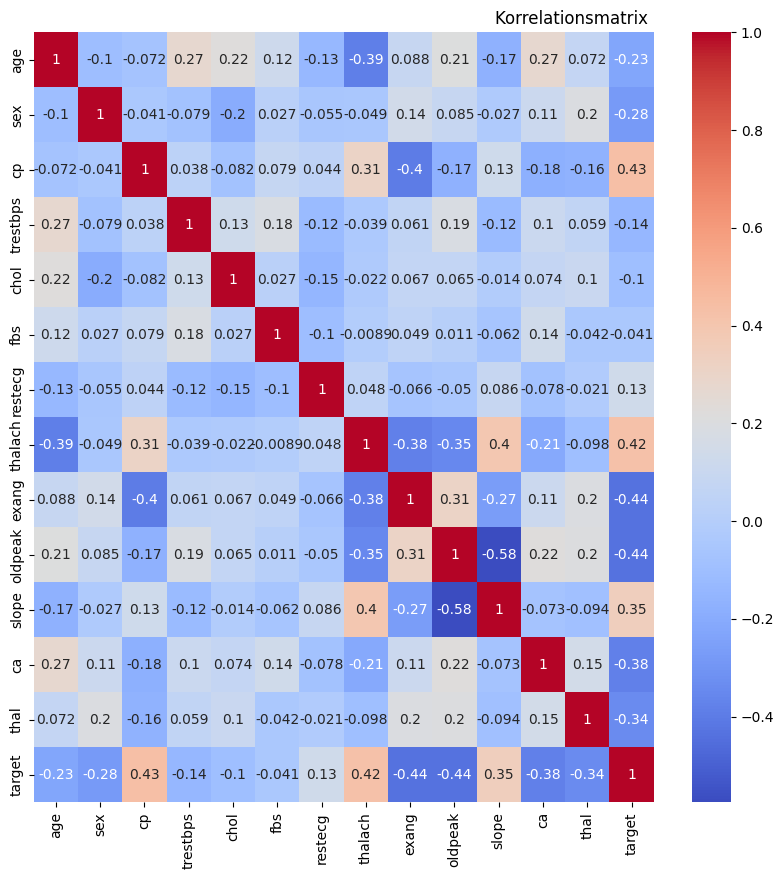

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_df , cmap='coolwarm',annot=True)
plt.title('Korrelationsmatrix ' , loc='right')
plt.show()

<p><b><i> Aus der obenstehenden Korrelationsmatrize , kann man herauslesen , dass die Feature keine linearen Zusammenhang zeigen , da die Korrelationswerten zu 0 neigen </i></b></p>

In [24]:
# Da es keine Linearität festgestellt werden konnte , handelt es sch definitiv um ein Klassifikationsfall
# Daten aufbereitung 

X = df.loc[: , :'thal']
Y = df['target']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.20 )

print(x_test.shape)
Counter(y_train) #------> 408 haben Herz-Attacke und 412 nicht 

(205, 13)


Counter({0: 398, 1: 422})

<p><b> Jetzt muss sichergestellt werden , dass die Daten gleichmäßig verteilt sind , sonst tritt im schlimmstenfalls Ausgleichsprobleme</b></p>


In [25]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test) # -----> Test Dataset

In [29]:
# models 
m1 = 'GaussianNB'
nbayes = GaussianNB()

model = nbayes.fit(x_train , y_train)
nb_preds = model.predict(x_test) #----> validierungsdataset
conf_matrix = confusion_matrix(y_test , nb_preds)
nbAccuracy = accuracy_score(y_test , nb_preds)

print("confussion matrix")
print(conf_matrix)
print("\n")
print("Accuracy of  Naives Bayes :",nbAccuracy * 100,'\n')
print(classification_report(y_test, nb_preds))

#Gut zu wissen 
# was ist eine confusion-matrix --> Eine Verwirrungsmatrix ist eine Technik zur Zusammenfassung der Leistung eines Klassifikationsalgorithmus.
#besser gesagt : Die Verwirrungsmatrix zeigt, auf welche Weise das Klassifikationsmodell verwirrt ist, wenn es Vorhersagen trifft
# Dabei wird Die Anzahl der richtigen und falschen Vorhersagen  mit Zählwerten zusammengefasst 
# Interpretationn des folgenden Resultat :
# [[85 , 16]] --> 85 richtige Vorhersage für Target 0 und 16 richtige Vorhersage für Target 1 
#[[16 , 88]] ---> 16 falsche Vorhersage für Target 0 und 88 falsche Vorhersage für Target 1

confussion matrix
[[85 16]
 [16 88]]


Accuracy of  Naives Bayes : 84.39024390243902 

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       101
           1       0.85      0.85      0.85       104

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



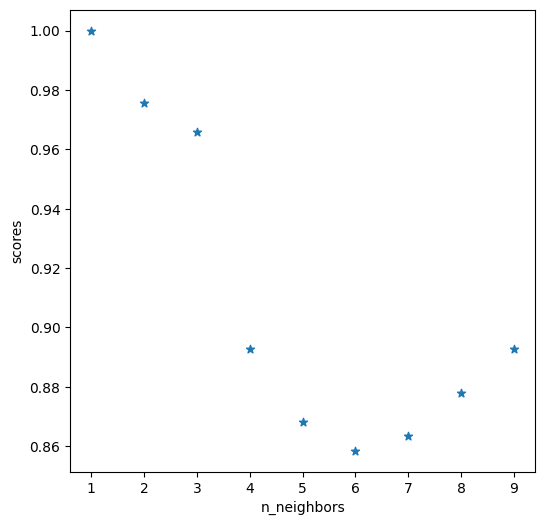

In [34]:
m2 = 'KNN'
scores = []
index = []
for i in range(1 ,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x_train , y_train)
    kn_preds = model.predict(x_test)
    kn_conf_matrix = confusion_matrix(y_test , kn_preds)
    kn_score = accuracy_score(y_test , kn_preds)
    scores.append(kn_score)
    index.append(i)
    
plt.figure(figsize=(6,6))
plt.scatter(index , scores , marker='*' )
plt.xlabel('n_neighbors')
plt.ylabel('scores')
plt.show()

# Laut dem erzeugten Diagramm ---> n_neighbors € [1 , 3]